In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
column_names = [
    "Water",
    "Food energy",
    "Protein",
    "Total lipids (fat)",
    "Ash",
    "Carbohydrate",
    "Total dietary fiber",
    "Total sugars",
    "Calcium",
    "Iron",
    "Magnesium",
    "Phosphorus",
    "Potassium",
    "Sodium",
    "Zinc",
    "Copper",
    "Manganese",
    "Selenium",
    "Vitamin C",
    "Thiamin",
    "Riboflavin",
    "Niacin",
    "Pantothenic acid",
    "Vitamin B6",
    "Total Folate",
    "Folic acid",
    "Food Folate",
    "Folate",
    "Vitamin B12",
    "Vitamin A",
    "VitA",
    "Retinol",
    "Vitamin E",
    "Vitamin K",
    "Alpha-carotene",
    "Beta-carotene",
    "Beta-cryptoxanthin",
    "Lycopene",
    "Lutein + zeaxanthin",
    "Saturated fatty acid",
    "Monounsaturated fatty acids",
    "Polyunsaturated fatty acids",
    "Cholesterol",
    "1st household weight from Weight file",
    "2nd household weight from Weight file",
    "Percent refuse"
]

In [3]:
x1 = pd.read_csv("x1.csv", header=None, names=column_names)
x2 = pd.read_csv("x2.csv", header=None, names=column_names)
x3 = pd.read_csv("x3.csv", header=None, names=column_names)

In [13]:
c1 = pd.read_csv("c1.csv", header=None, names=['Gt'])
c2 = pd.read_csv("c2.csv", header=None, names=['Gt'])
c1

,Gt
0,5
1,9
2,5
3,2
4,7
...,...
893,9
894,9
895,3
896,5


In [5]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Water                                  898 non-null    float64
 1   Food energy                            898 non-null    float64
 2   Protein                                898 non-null    float64
 3   Total lipids (fat)                     898 non-null    float64
 4   Ash                                    898 non-null    float64
 5   Carbohydrate                           898 non-null    float64
 6   Total dietary fiber                    898 non-null    float64
 7   Total sugars                           898 non-null    float64
 8   Calcium                                898 non-null    float64
 9   Iron                                   898 non-null    float64
 10  Magnesium                              898 non-null    float64
 11  Phosph

In [6]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gt      898 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
## !pip install threadpoolctl==3.1.0

In [8]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x1, np.ravel(c1))


KNeighborsClassifier(n_neighbors=1)

In [9]:
c_hat = knn.predict(x2)

In [15]:
accuracy = accuracy_score(c_hat, c2)
print("accuracy: ", accuracy)

accuracy:  0.8504464285714286


In [20]:
matrix = confusion_matrix(c_hat, c2)
matrix

array([[ 87,   0,   4,   6,   5,   1,   2,   1,   0,   0],
       [  0, 150,   2,   2,   0,   4,   2,   0,   0,   0],
       [  1,   7,  61,   3,   2,   2,   0,   2,   0,   0],
       [  3,   0,   1,  47,   1,   0,   1,   0,   0,   0],
       [  4,   2,   0,   5,  55,   1,   0,   1,   1,   0],
       [  0,   8,   1,   4,   2,  40,   1,   1,   0,   0],
       [  2,   1,   1,   3,   0,   2,  73,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,  59,   4,   5],
       [  0,   1,   0,   1,   1,   0,   0,   5, 146,  13],
       [  0,   0,   0,   0,   0,   0,   1,   2,   7,  44]])

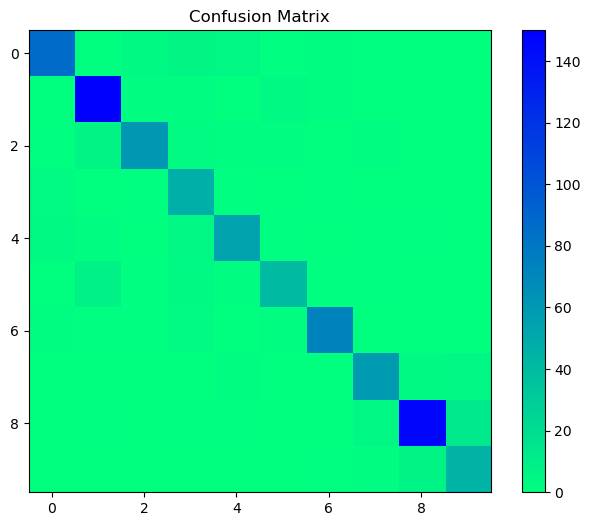

In [33]:
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest', cmap ='winter_r')
plt.title("Confusion Matrix")
plt.colorbar()